In [5]:
import pandas as pd
import numpy as np

# Install openpyxl if not already installed
!pip install openpyxl

def xlsx_to_dataframe(file_path):
  try:
    df = pd.read_excel(file_path, engine='openpyxl')  # Use openpyxl engine
    return df
  except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'")
    return None
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

# Example usage
file_path = '/content/DSAICourseInterestRelevanceSurvey.xlsx'
df = xlsx_to_dataframe(file_path)

if df is not None:

    try:
      cropped_df = df.iloc[0:24, 0:11] # Crop the DataFrame
      cropped_matrix = cropped_df.values # Convert to NumPy matrix
      print(cropped_matrix)

    except IndexError:
      print("Error: Cropping indices out of bounds. Check your DataFrame dimensions.")
    except Exception as e:
      print(f"An error occurred during cropping or matrix conversion: {e}")

[['Student 1' 4.0 3.0 4.0 1.0 1.0 1.0 4.0 5.0 5.0 5.0]
 ['Student 2' 3.0 3.0 3.0 1.0 1.0 1.0 4.0 5.0 5.0 5.0]
 ['Student 3' 4.0 4.0 3.0 3.0 4.0 2.0 4.0 5.0 4.0 nan]
 ['Student 4' 3.0 4.0 4.0 1.0 1.0 1.0 5.0 5.0 5.0 2.0]
 ['Student 5' 3.0 3.0 4.0 3.0 3.0 2.0 4.0 5.0 5.0 4.0]
 ['Student 6' 3.0 3.0 5.0 1.0 1.0 1.0 4.0 5.0 5.0 5.0]
 ['Student 7' 3.0 4.0 4.0 1.0 1.0 1.0 4.0 4.0 4.0 5.0]
 ['Student 8' 3.0 4.0 2.0 2.0 3.0 2.0 4.0 4.0 4.0 5.0]
 ['Student 9' 3.0 4.0 4.0 2.0 3.0 1.0 4.0 4.0 4.0 4.0]
 ['Student 10' 4.0 4.0 3.0 3.0 2.0 2.0 4.0 4.0 5.0 4.0]
 ['Student 11' 4.0 5.0 4.0 2.0 3.0 3.0 5.0 5.0 5.0 4.0]
 ['Student 12' 3.0 3.0 3.0 1.0 1.0 2.0 5.0 4.0 3.0 5.0]
 ['Student 13' 2.0 3.0 3.0 1.0 1.0 2.0 4.0 4.0 3.0 3.0]
 ['Student 14' 3.0 3.0 4.0 2.0 2.0 2.0 4.0 5.0 4.0 4.0]
 ['Student 15' 4.0 4.0 5.0 3.0 3.0 1.0 4.0 5.0 4.0 5.0]
 ['Student 16' 3.0 3.0 4.0 1.0 1.0 1.0 4.0 4.0 4.0 4.0]
 ['Student 17' 4.0 4.0 3.0 1.0 1.0 1.0 5.0 5.0 5.0 5.0]
 ['Student 18' 3.0 4.0 3.0 2.0 1.0 3.0 4.0 4.0 4.0 5.0]
 

In [6]:
#randomly suffle the student


if df is not None:
    try:
        # Crop the DataFrame (adjust indices as needed)
        cropped_df = df.iloc[0:24, 0:11]

        # Shuffle the DataFrame randomly
        shuffled_df = cropped_df.sample(frac=1).reset_index(drop=True)

        # Display the shuffled DataFrame in tabular format
        print(shuffled_df)

    except IndexError:
        print("Error: Cropping indices out of bounds. Check your DataFrame dimensions.")
    except Exception as e:
        print(f"An error occurred during shuffling or display: {e}")

    Unnamed: 0  MAL100  MAL101  MAL403  EEL101  ECL101  BML101  CSL100  \
0    Student 2     3.0     3.0     3.0     1.0     1.0     1.0     4.0   
1   Student 24     3.0     5.0     5.0     2.0     1.0     1.0     4.0   
2   Student 16     3.0     3.0     4.0     1.0     1.0     1.0     4.0   
3   Student 21     3.0     4.0     3.0     2.0     3.0     1.0     4.0   
4    Student 6     3.0     3.0     5.0     1.0     1.0     1.0     4.0   
5   Student 17     4.0     4.0     3.0     1.0     1.0     1.0     5.0   
6   Student 12     3.0     3.0     3.0     1.0     1.0     2.0     5.0   
7   Student 11     4.0     5.0     4.0     2.0     3.0     3.0     5.0   
8   Student 18     3.0     4.0     3.0     2.0     1.0     3.0     4.0   
9    Student 1     4.0     3.0     4.0     1.0     1.0     1.0     4.0   
10  Student 19     3.0     3.0     4.0     1.0     2.0     1.0     4.0   
11  Student 14     3.0     3.0     4.0     2.0     2.0     2.0     4.0   
12  Student 22     4.0     5.0     5.0

In [7]:
def replace_data_with_zero(df, percentage, replace_with='zero'):
    try:
        # Exclude first row and first column
        df_to_modify = df.iloc[1:, 1:]

        total_cells = df_to_modify.size
        num_cells_to_replace = int(total_cells * (percentage / 100))

        # Generate random row and column indices for the modified DataFrame
        row_indices = np.random.choice(df_to_modify.index, size=num_cells_to_replace, replace=True)
        col_indices = np.random.choice(df_to_modify.columns, size=num_cells_to_replace, replace=True)

        # Replace values in the original DataFrame using the modified indices
        for row, col in zip(row_indices, col_indices):
            if replace_with == 'zero':
                df.loc[row, col] = 0
            else:
                print("Error: Invalid 'replace_with' value. Choose 'zero' or 'null'.")
                return df
        return df
    except (ValueError, TypeError):
        print("Error: Invalid input. Percentage must be a number between 0 and 100.")
        return df  # Return original DataFrame on error
    except Exception as e:
        print(f"An error occurred: {e}")
        return df
values=[20,40,60,80]
if df is not None:
    try:
        # Example: Replace 20% of the data with 0, excluding first row and column

          modified_df = replace_data_with_zero(shuffled_df, 20, replace_with='zero')
          print(modified_df)
    except Exception as e:
        print(f"An error occurred during processing: {e}")

    Unnamed: 0  MAL100  MAL101  MAL403  EEL101  ECL101  BML101  CSL100  \
0    Student 2     3.0     3.0     3.0     1.0     1.0     1.0     4.0   
1   Student 24     3.0     5.0     5.0     0.0     1.0     1.0     0.0   
2   Student 16     0.0     3.0     4.0     1.0     1.0     1.0     4.0   
3   Student 21     3.0     4.0     3.0     2.0     0.0     1.0     4.0   
4    Student 6     3.0     3.0     5.0     1.0     1.0     0.0     4.0   
5   Student 17     0.0     4.0     3.0     0.0     1.0     1.0     5.0   
6   Student 12     3.0     3.0     3.0     1.0     1.0     0.0     5.0   
7   Student 11     4.0     5.0     4.0     2.0     3.0     3.0     5.0   
8   Student 18     3.0     4.0     0.0     2.0     1.0     3.0     4.0   
9    Student 1     4.0     3.0     0.0     1.0     1.0     1.0     4.0   
10  Student 19     3.0     3.0     4.0     0.0     2.0     1.0     4.0   
11  Student 14     0.0     3.0     4.0     2.0     2.0     0.0     4.0   
12  Student 22     4.0     5.0     5.0

# Problem Statement: Missing Data Prediction and Analysis

You are provided with a dataset ([DSAICourseInterestRelevanceSurvey.xlsx](https://docs.google.com/spreadsheets/d/1oUyjxtFn_TmuQZkaJqEfISq4RTX9MVNuQUx2YbuMTHM/edit?gid=0#gid=0)) containing survey responses about student interest and courses. Your task is to simulate the scenario of missing data and build a model to predict those missing values.

Tasks:

Data Preprocessing:
Experiment with missing data percentages ranging from 20% to 80%.

Model Building:
Write a algorithms such that it predicts the missing values(e.g., Linear Regression).

Evaluation and Visualization:
Calculate the Mean Squared Error (MSE) to evaluate the accuracy of your predictions. The MSE measures the average squared difference between the actual and predicted values.
Create a plot to visualize the relationship between the actual and predicted values.

Original Data (with 0.0 as missing values):
    Unnamed: 0  MAL100  MAL101  MAL403  EEL101  ECL101  BML101  CSL100  \
0    Student 2     3.0     3.0     3.0     1.0     1.0     1.0     4.0   
1   Student 24     3.0     5.0     5.0     NaN     1.0     1.0     NaN   
2   Student 16     NaN     3.0     4.0     1.0     1.0     1.0     4.0   
3   Student 21     3.0     4.0     3.0     2.0     NaN     1.0     4.0   
4    Student 6     3.0     3.0     5.0     1.0     1.0     NaN     4.0   
5   Student 17     NaN     4.0     3.0     NaN     1.0     1.0     5.0   
6   Student 12     3.0     3.0     3.0     1.0     1.0     NaN     5.0   
7   Student 11     4.0     5.0     4.0     2.0     3.0     3.0     5.0   
8   Student 18     3.0     4.0     NaN     2.0     1.0     3.0     4.0   
9    Student 1     4.0     3.0     NaN     1.0     1.0     1.0     4.0   
10  Student 19     3.0     3.0     4.0     NaN     2.0     1.0     4.0   
11  Student 14     NaN     3.0     4.0     2.0     2.0     NaN     4

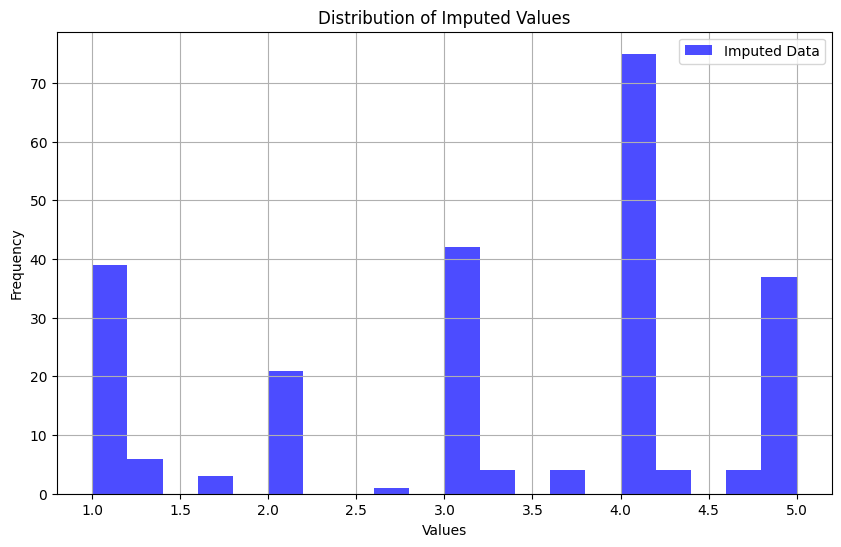

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer



# Replace 0.0 with NaN (indicating missing values)
modified_df.replace(0.0, np.nan, inplace=True)

# Apply KNN Imputer (k=3)
imputer = KNNImputer(n_neighbors=3, weights="uniform")

# Selecting only numeric columns (excluding student names)
numeric_data = modified_df.iloc[:, 1:]  # Exclude first column (Student names)
imputed_data = imputer.fit_transform(numeric_data)

# Convert back to DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=numeric_data.columns)

# Reattach the "Student" column
df_imputed.insert(0, "Student", modified_df.iloc[:, 0])

# Display first few rows of the imputed dataset
print("Original Data (with 0.0 as missing values):")
print(modified_df)

print("\nImputed Data:")
print(df_imputed)

# Visualization: Compare missing vs imputed data
plt.figure(figsize=(10, 6))
plt.hist(df_imputed.iloc[:, 1:].values.flatten(), bins=20, alpha=0.7, label="Imputed Data", color='b')
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Distribution of Imputed Values")
plt.legend()
plt.grid(True)
plt.show()




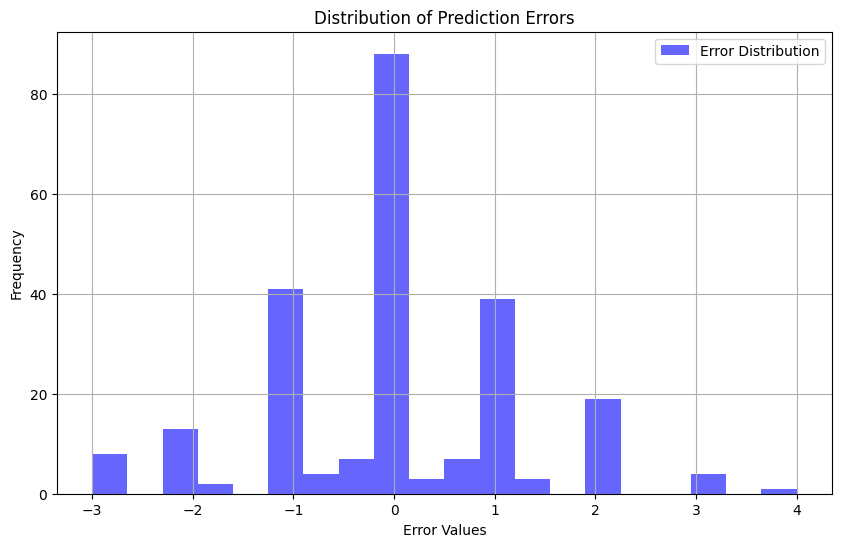

Mean Squared Error for each feature:
MAL100    1.398148
MAL101    1.375000
MAL403    1.638889
EEL101    1.203704
ECL101    1.842593
BML101    1.384259
CSL100    1.351852
CSL201    1.958333
CSL202    1.143519
DSL201    1.294686
dtype: float64


In [9]:
# Error Analysis
error = cropped_df.iloc[:, 1:] - df_imputed.iloc[:, 1:]
mse_error = np.mean(error ** 2, axis=0)

# Visualization of error distribution
plt.figure(figsize=(10, 6))
plt.hist(error.values.flatten(), bins=20, alpha=0.6, label="Error Distribution", color='blue')
plt.xlabel("Error Values")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.legend()
plt.grid(True)
plt.show()

print("Mean Squared Error for each feature:")
print(mse_error)